In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [2]:
# Load dataset
df = pd.read_csv("heart_data.csv")

In [3]:
# Features and target
X = df.drop("target", axis=1)
y = df["target"]

In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Handle class imbalance
weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(weights))


In [7]:
# Build ANN model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


In [9]:
# Train model
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=16, class_weight=class_weights, validation_split=0.1)


Epoch 1/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5342 - loss: 0.6881 - val_accuracy: 0.5610 - val_loss: 0.6301
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6819 - loss: 0.5852 - val_accuracy: 0.7561 - val_loss: 0.5506
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8020 - loss: 0.4764 - val_accuracy: 0.8049 - val_loss: 0.4959
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8057 - loss: 0.4172 - val_accuracy: 0.7927 - val_loss: 0.4707
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8550 - loss: 0.3956 - val_accuracy: 0.7927 - val_loss: 0.4655
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8310 - loss: 0.3807 - val_accuracy: 0.7927 - val_loss: 0.4632
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8510 - loss: 0.3560 - val_accuracy: 0.7927 - val_loss: 0.4630
Epoch 8/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8395 - loss: 0.3725 - val_accuracy: 0.7805 - val_loss

In [10]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8512 - loss: 0.3196 
Test Accuracy: 0.8341


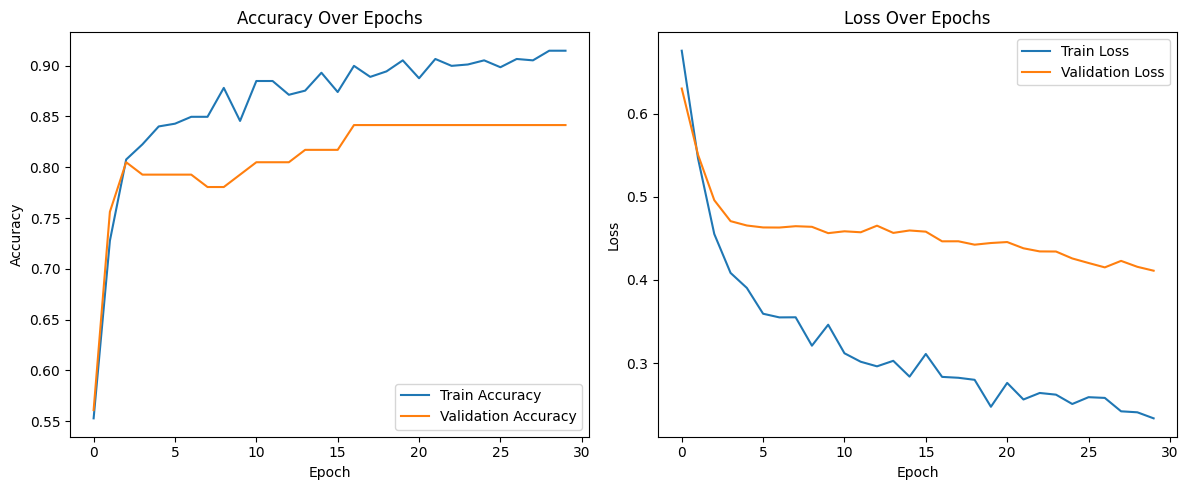

In [11]:

# Visualize performance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()